<a href="https://colab.research.google.com/github/Cassi686/Cassi686/blob/main/ecommerce_modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


Dataframe:

In [ ]:
# Abrindo dataframe
df = pd.read_csv('/content/data (1).csv', encoding= 'ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Data Understand

In [ ]:
df.shape # dimensões do dataframe

(523553, 8)

In [ ]:
# Observando colunas
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Descrição do dataframe
df.describe()

,Quantity,UnitPrice,CustomerID
count,523553.000000,523553.000000,394783.000000
mean,9.572070,4.563734,15286.804108
std,155.313657,93.660651,1713.359604
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13952.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16790.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
# Informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523553 entries, 0 to 523552
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    523553 non-null  object 
 1   StockCode    523553 non-null  object 
 2   Description  522109 non-null  object 
 3   Quantity     523553 non-null  int64  
 4   InvoiceDate  523553 non-null  object 
 5   UnitPrice    523553 non-null  float64
 6   CustomerID   394783 non-null  float64
 7   Country      523553 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.0+ MB


In [ ]:
# Observando dados nulos
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1444
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128770
Country             0
dtype: int64

In [ ]:
df.duplicated() # observando dados duplicados

0         False
1         False
2         False
3         False
4         False
          ...  
523548    False
523549    False
523550    False
523551    False
523552    False
Length: 523553, dtype: bool

In [ ]:
df.duplicated().sum() # total de duplicatas

5089

In [ ]:
df_quantity_m0 = df[df['Quantity']<0] # filtrando valores menores que zero na coluna quantidade
df_quantity_m0.shape # observando dimensões dos valores filtrados

(10374, 8)

In [ ]:
df_price_m0 = df[df['UnitPrice']<0] # filtrando valores menores que zero na coluna preço
df_price_m0.shape # observando dimensões dos valores filtrados

(2, 8)

<Axes: >

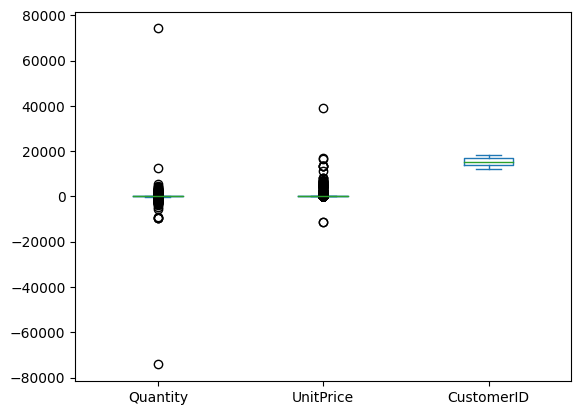

In [ ]:
# Observando outliers

df.plot.box()

Data Preparetion

In [ ]:
df = df.dropna() # Dropando dados nulos
df.isnull().sum()# Checando


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df = df.drop_duplicates() # Dropando duplicates
df.duplicated().sum() # Checando

0

In [ ]:
# Transformando coluna CustomerID em int.
df['CustomerID']=df['CustomerID'].astype(int)

In [ ]:
# Transformado coluna InvoiceDate em datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389737 entries, 0 to 523552
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    389737 non-null  object        
 1   StockCode    389737 non-null  object        
 2   Description  389737 non-null  object        
 3   Quantity     389737 non-null  int64         
 4   InvoiceDate  389737 non-null  datetime64[ns]
 5   UnitPrice    389737 non-null  float64       
 6   CustomerID   389737 non-null  int64         
 7   Country      389737 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 26.8+ MB


In [ ]:
from sklearn.preprocessing import scale

In [ ]:
def is_outlier(array, extreme=False):
  q3,q1 = np.quantile(array,[.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr


  return  (array > upper_outlier) # Função para detectar outliers

In [ ]:
# Mostrando a aplicação da função na coluna quantidade
is_outlier(df.Quantity)

0         True
1         True
2         True
3         True
4         True
          ... 
523548    True
523549    True
523550    True
523551    True
523552    True
Name: Quantity, Length: 389737, dtype: bool

In [ ]:
# Quantidade de outliers na coluna quantidade
is_outlier(df.Quantity).sum()

388735

In [ ]:
# Aplicação da função na coluna preço unitário
is_outlier(df.UnitPrice)

0         True
1         True
2         True
3         True
4         True
          ... 
523548    True
523549    True
523550    True
523551    True
523552    True
Name: UnitPrice, Length: 389737, dtype: bool

In [ ]:
# Quantidade de outliers na coluna preço unitário
is_outlier(df.UnitPrice).sum()

389737

In [ ]:
df['Total'] = df['Quantity'] * df['UnitPrice'] # Criando nova coluna

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Data da última compra
data_mais_recente = df['InvoiceDate'].max()
data_mais_recente

Timestamp('2011-12-04 14:01:00')

In [ ]:
top10_paises = df.groupby('Country')['Total'].sum().head(10).reset_index()
top10_paises


,Country,Total
0,Australia,137009.77
1,Austria,9471.12
2,Bahrain,548.40
3,Belgium,39803.55
4,Brazil,1143.60
5,Canada,3666.38
6,Channel Islands,19882.24
7,Cyprus,12858.76
8,Czech Republic,707.72
9,Denmark,18599.24


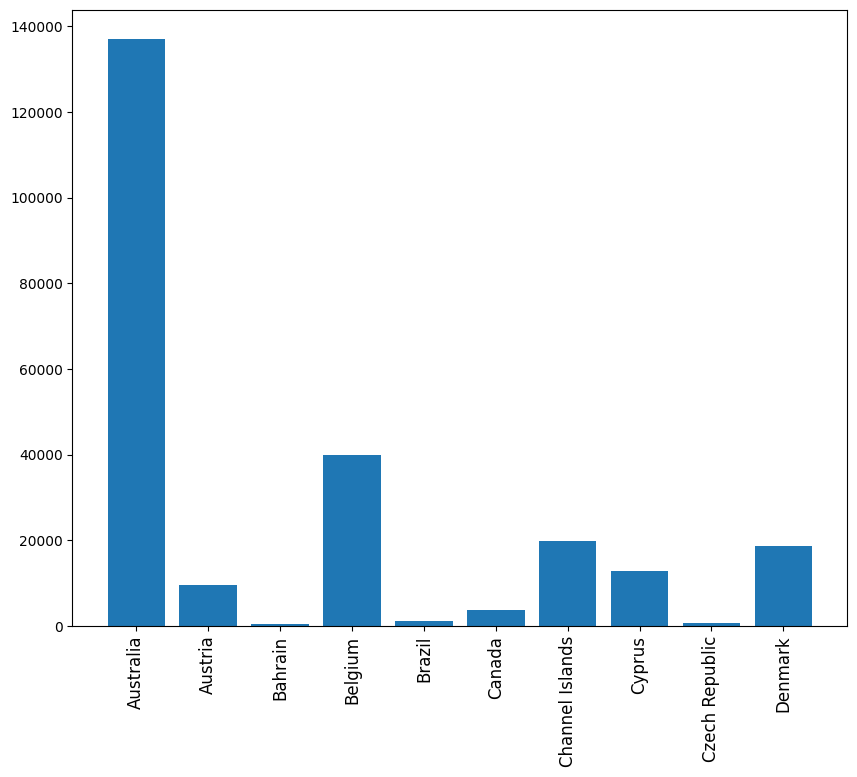

In [ ]:
plt.figure(figsize=(10,8))

plt.bar(top10_paises['Country'],top10_paises['Total'])
plt.tick_params(axis='x', labelsize = 12, rotation = 90);

# Gráfic com os top 10 países com maior valor de vendas

In [ ]:
top10_produtos = df.groupby('Description')['Quantity'].sum().head(10).reset_index()
top10_produtos

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,89
1,50'S CHRISTMAS GIFT BAG LARGE,1855
2,DOLLY GIRL BEAKER,2358
3,I LOVE LONDON MINI BACKPACK,339
4,I LOVE LONDON MINI RUCKSACK,1
5,NINE DRAWER OFFICE TIDY,47
6,OVAL WALL MIRROR DIAMANTE,115
7,RED SPOT GIFT BAG LARGE,1625
8,SET 2 TEA TOWELS I LOVE LONDON,2613
9,SPACEBOY BABY GIFT SET,440


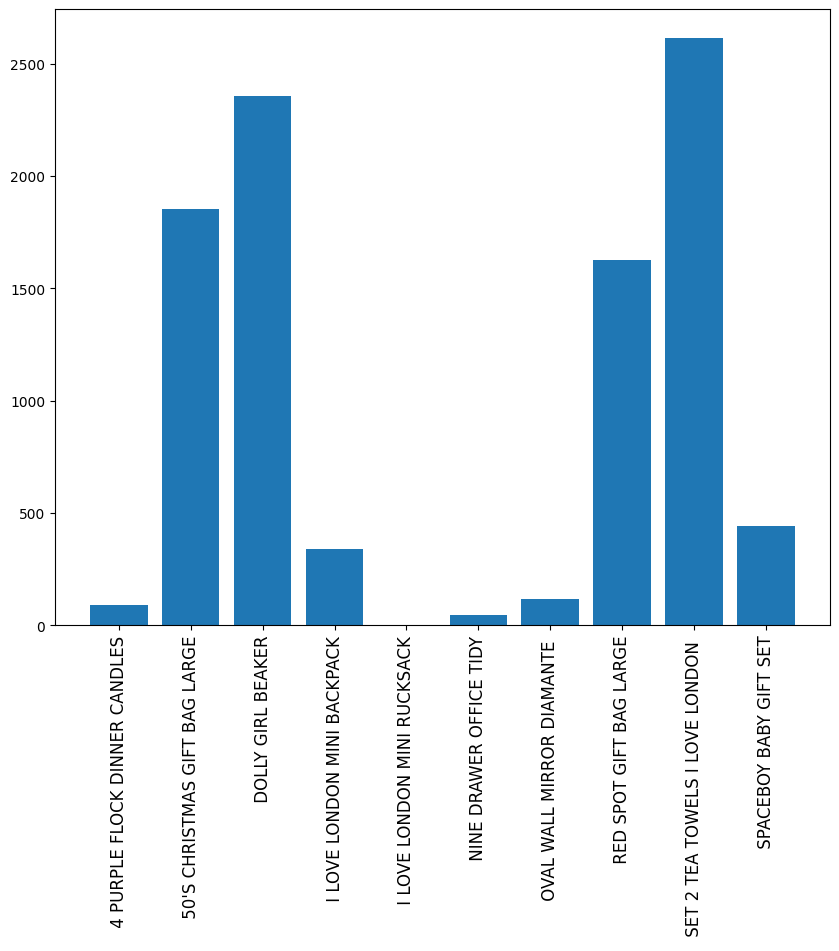

In [ ]:
plt.figure(figsize=(10,8))

plt.bar(top10_produtos['Description'],top10_produtos['Quantity'])
plt.tick_params(axis='x', labelsize = 12, rotation = 90);

In [ ]:
vendas_mes = df.groupby(df['InvoiceDate'].dt.month)['Total'].sum().reset_index()
vendas_mes

,InvoiceDate,Total
0,1,473731.900
1,2,435534.070
2,3,578576.210
3,4,425222.671
4,5,647011.670
5,6,606862.520
6,7,573112.321
7,8,615078.090
8,9,929356.232
9,10,973306.380


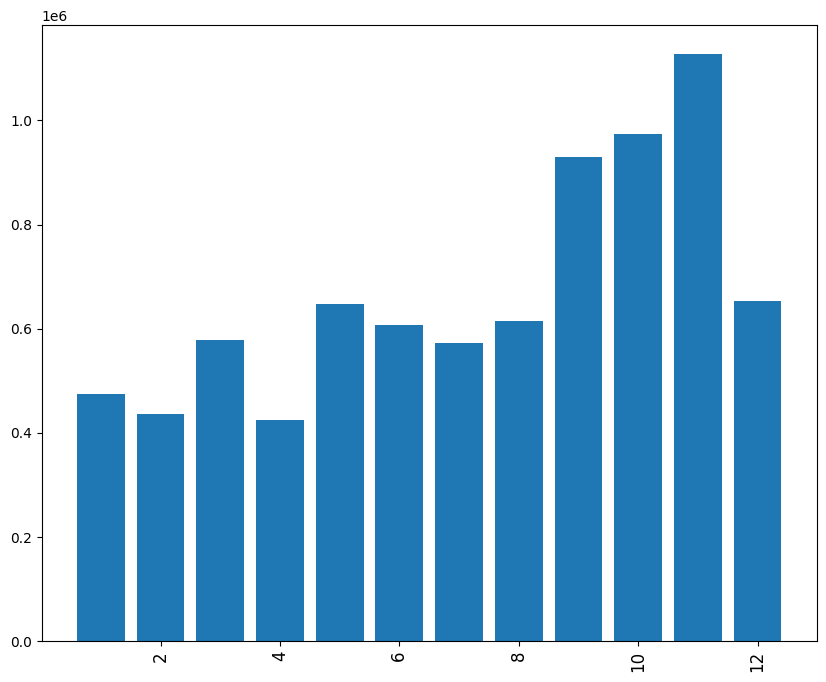

In [ ]:
plt.figure(figsize=(10,8))

plt.bar(vendas_mes['InvoiceDate'],vendas_mes['Total'])
plt.tick_params(axis='x', labelsize = 12, rotation = 90);

# Total de vendas por mês

In [ ]:
df_recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_recency['Recency'] = (data_mais_recente - df_recency['InvoiceDate']).dt.days
df_recency = df_recency.drop('InvoiceDate',axis=1)

# Calculo da recência

In [ ]:
df_recency.head(3)

,CustomerID,Recency
0,12346,320
1,12347,34
2,12348,70


In [ ]:
# Calculo da frequência

df_frequency = df.groupby('CustomerID').agg({'InvoiceDate':'count'}).reset_index()
df_frequency = df_frequency.rename(columns={'InvoiceDate':'Frequency'})

In [ ]:
df_frequency.head(3)

,CustomerID,Frequency
0,12346,2
1,12347,171
2,12348,31


In [ ]:
df_monetary_value = df
df_monetary_value['MonetaryValue'] = df['Quantity'] * df['UnitPrice']
df_monetary_value = df_monetary_value.groupby('CustomerID').agg({'MonetaryValue':'sum'}).reset_index()

# Calculando Monetary Value

In [ ]:
df_monetary_value.head(3)

,CustomerID,MonetaryValue
0,12346,0.00
1,12347,4085.18
2,12348,1797.24
